# **AP157 Machine Learning Lab Assignment**
## Module 2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [ ]:
import numpy as np

data = np.load(file_path + 'Copy of galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [ ]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

**DISCUSSION**

*The plan here is to find a way to store the dataset into an array. Then, we can split them into input features, which are 13 in total, and their corresponding targets or the classes.*

First, we make use of NumPy's `dtype.names` attribute, which allows us to generate an ordered list of field names. In our function to split the dataset, we create an ampty array where we could store the features later, and just use the class already provided in our data as the targets. We use a for loop to assign our data into features. In the code below, we do not need to type the 13 features individually anymore, we just exploit the indices of the elements to store them accordingly.

We then call the function `get_features_targets` to assign the values to the variables feature and target. We will call this function and variables later.

In [ ]:
import numpy as np

# Store the dataset into an array
input = data.dtype.names

# Function to split the dataset into features and targets
def get_features_targets(data):
  feature = np.zeros((len(data), 13)) #empty array to store our features later
  target = data['class']
  # We make use of our input function and use it in a for loop so that we wont need to type the features individually
  for i in range(10): #for the first 10 elements of our data type
    feature[:, i] = data[input[i]]
  for j in range(3): #for the remaining 3 elements (concentrations  R50/R90)
    feature[:, j+10] = data[input[j+10]].astype('float')/data[input[j+13]].astype('float')
  return feature, target

features, targets = get_features_targets(data)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


Features shape: (780, 13)
Targets shape: (780,)


Here, we see that we have 780 datapoints, which means that we have 780 targets as well. Meanwhile, for the features, the 780 datapoints have 13 inputs all in all, given by the 4 galaxy colors ( u−g ,  g−r ,  r−i , and  i−z ), eccentricity,  ugriz  magnitudes, and concentrations  R50/R90  in the  u ,  r , and  z  bands.

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

For this part, we now perform a prediction model to assign our features to their targets. To do this, we use Sklearn's `train_test_split` function again to divide our dataset. Unlike in activity 1, we no longer use cross-validation here, so we just call the function once. We then assign train and test values to our `get_features_targets` function so that we could have training and test datasets for our features and targets. Next, we use Sklearn's decision tree implementation to predict the classes of our targets.

Then, we call the function we made to display the actual and the predicted class.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


data = np.load(file_path + 'Copy of galaxy_catalogue.npy')

# We make a function to predict our targets using a decision tree classifier
def predict_class():
  np.random.seed()
  np.random.shuffle(data)
  # We split the dataset into train and test (80:20) and we use it as an input to our get_features_targets function
  train, test = train_test_split(data, train_size=0.8, random_state= 1)
  feat_train, target_train = get_features_targets(train)
  feat_test, target_test = get_features_targets(test)

  # We use the scikit-learn decision tree implementation
  model = DecisionTreeClassifier()
  fit = model.fit(feat_train,target_train)
  target_pred = model.predict(feat_test)

  # Return two arrays-- the predicted and actual class of the test galaxies.
  return target_pred, target_test

predicted_class, actual_class = predict_class()
for k in np.arange(5):
   print("%d, %s, %s" % (k+1, predicted_class[k], actual_class[k])) # %d is a placeholder for decimal integer and %s for string

1, elliptical, elliptical
2, spiral, spiral
3, merger, merger
4, elliptical, elliptical
5, elliptical, elliptical


Here, we see that for five galaxies, we displayed two arrays containing its predicted class and the actual one. It can be seen that the two do not always coincide, which is expected since our decision tree is bound to have errors, too. The accuracy of our model will be determined in the next steps.

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

A confusion matrix is a table consisting of the performance of a model when we know the true values of its data ([Data school](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing.)). In this part, we make use of Sklearn's `confusion_matrix` function to generate our matrix. We also use seaborn to customize our heatmap for better visualization of the values.

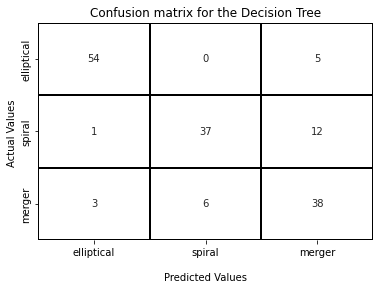

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Plot the confusion matrix using sklearn.metrics and seaborn for the heatmap. We create a list of the targets as the labels
conf = confusion_matrix(predicted_class, actual_class, labels=list(set(targets)))
ax = sns.heatmap(conf, cbar=False, linewidth = 1, linecolor="black", annot=True, cmap=ListedColormap(['white']))
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title('Confusion matrix for the Decision Tree');
ax.xaxis.set_ticklabels(list(set(targets)))
ax.yaxis.set_ticklabels(list(set(targets)))

plt.show()

The confusion matrix above shows the summary of the predictions in our morphological classification. The areas in diagonal from top left to bottom right shows the correct values of our classes and the other ones represent the confusion of our model in predicting the values. If we add all of the numbers, we get 156 values, which is exactly 20% of our original dataset, and is equal to our training dataset.

From this, we see that the model, indeed, has some confusion in predicting the data. We calculate this in the next portion.



In [ ]:
accuracy = sum(actual_class==predicted_class)/len(predicted_class)
print(accuracy)

0.8269230769230769


The accuracy of our model is obtained by taking the sum of the correct values, meaning the correct class predictions made by our model, divided by the number of class predicted. We see that our model has an accuracy of around 80%, which means that it can predict the correct classes 8 in 10 times.

This can also be verified using the confusion matrix in the previous figure. As we can see, the total number of correct values will be exactly around 80% of 156.

To minimize our error, we can add more datasets to increase our confidence in the estimate of the model.